In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf        
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product
from scipy.optimize import minimize
from dateutil.relativedelta import relativedelta

import warnings                         
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Collection

##### To read the date column correctly, we can use the argument parse_dates to specify a list of date columns. Here the variable "data" is the data frame and data.head() is used to display the first five rows of dataset

In [2]:
data = pd.read_csv("data_set/salesdaily.csv",parse_dates=['datum'],index_col = 'datum')
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


#### data.tail() is used to display last five rows of the dataset 

In [3]:
data.tail()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2019-10-07,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2019-10-08,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


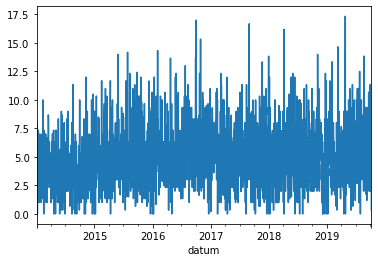

In [5]:
data['M01AB'].plot()

#### The above plot is single drug's line plot. Let's plot all colums using subplots  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa21f33d390>,
      dtype=object)

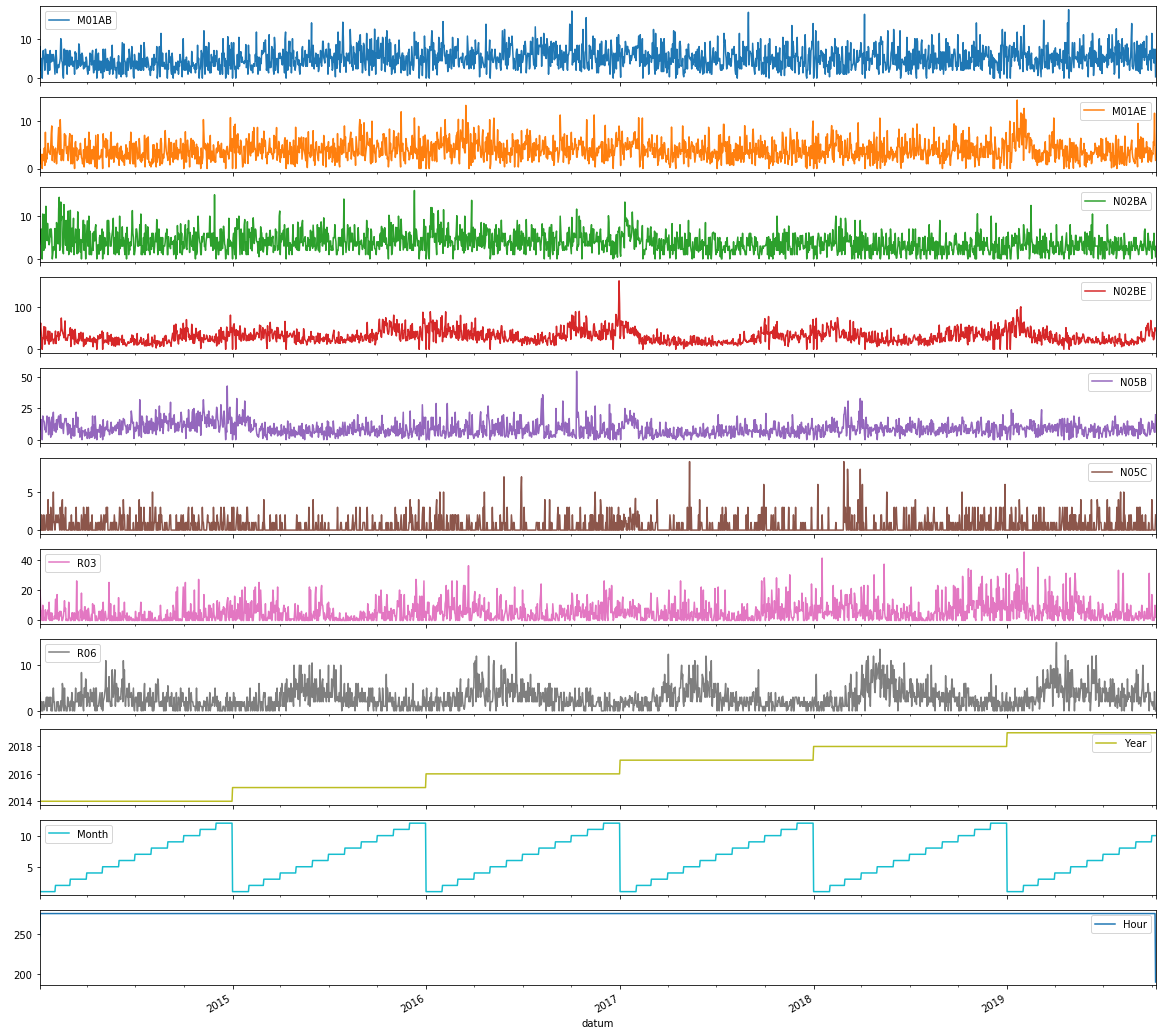

In [6]:
data.plot(subplots = True, figsize = (20,20))

### The line plots used above are good for showing seasonality.
#### Seasonality : In TS data, seasonality is the presence of variations that occur at specific regular time intervals less than a year, such as hourly, weekly, monthly, quaterly, yearly. So it is the repeating short-term cycle in a series or it can also be periodic fluctuation 

In [7]:
cols = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]

In [25]:
def plot_graph(data,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(data[col])
        plt.title(col) 

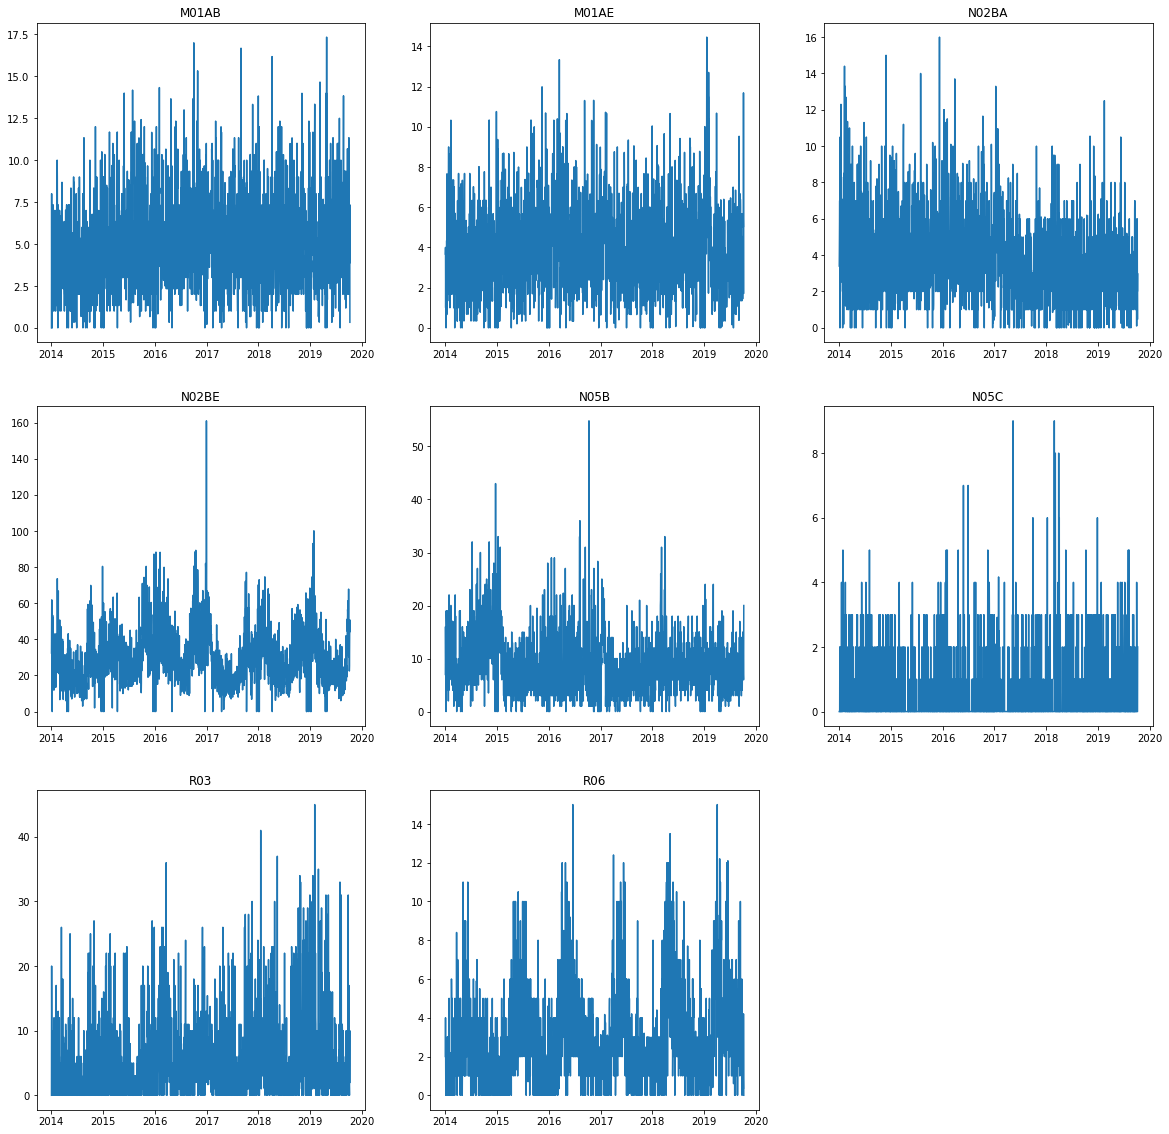

In [26]:
plot_graph(data,cols)

#### The above plots are line plots of drugs which are handy to check their seasonality, trends of drugs.

## Data Preprocessing

### Resampling 

#### This data is in chronological order, just to verrify it again sorting of the data frame is done below by the time stamps and the timestamps are equvidistant in time series.

<BarContainer object of 6 artists>

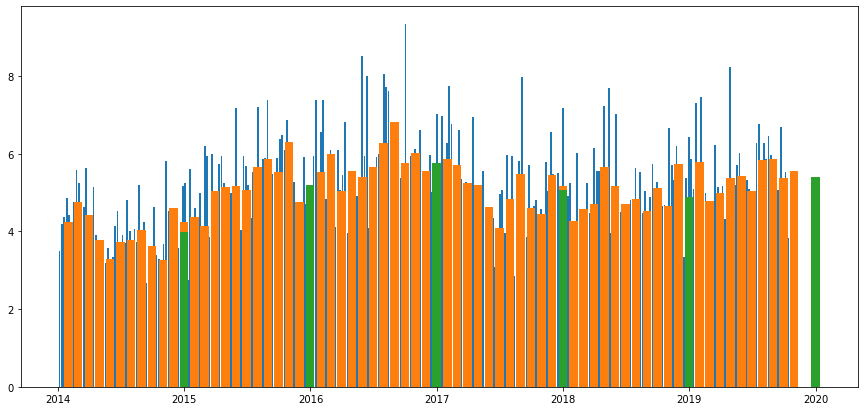

In [10]:
# Resampling the time series data based on monthly 'M',W yearly 'Y', weekly 'W' frequency
df_month = data.resample("M").mean()
df_year = data.resample("Y").mean()
df_week = data.resample("W").mean()
# using subplot
fig, ax = plt.subplots(figsize=(15,7))
  
# plotting bar graph
ax.bar(df_week['2014':].index, 
       df_week.loc['2014':, "M01AB"], 
       width= 5, align='center')
ax.bar(df_month['2014':].index, 
       df_month.loc['2014':, "M01AB"], 
       width= 25, align='center')
ax.bar(df_year['2014':].index, 
       df_year.loc['2014':, "M01AB"], 
       width= 25, align='center')

### Resampling of all drugs weekly, montly and  yearly

In [30]:
def plot_graph(df_week,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_week[col])
        plt.title(col,fontsize=14) 
        

In [44]:
data = data.sort_values(by='datum')
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


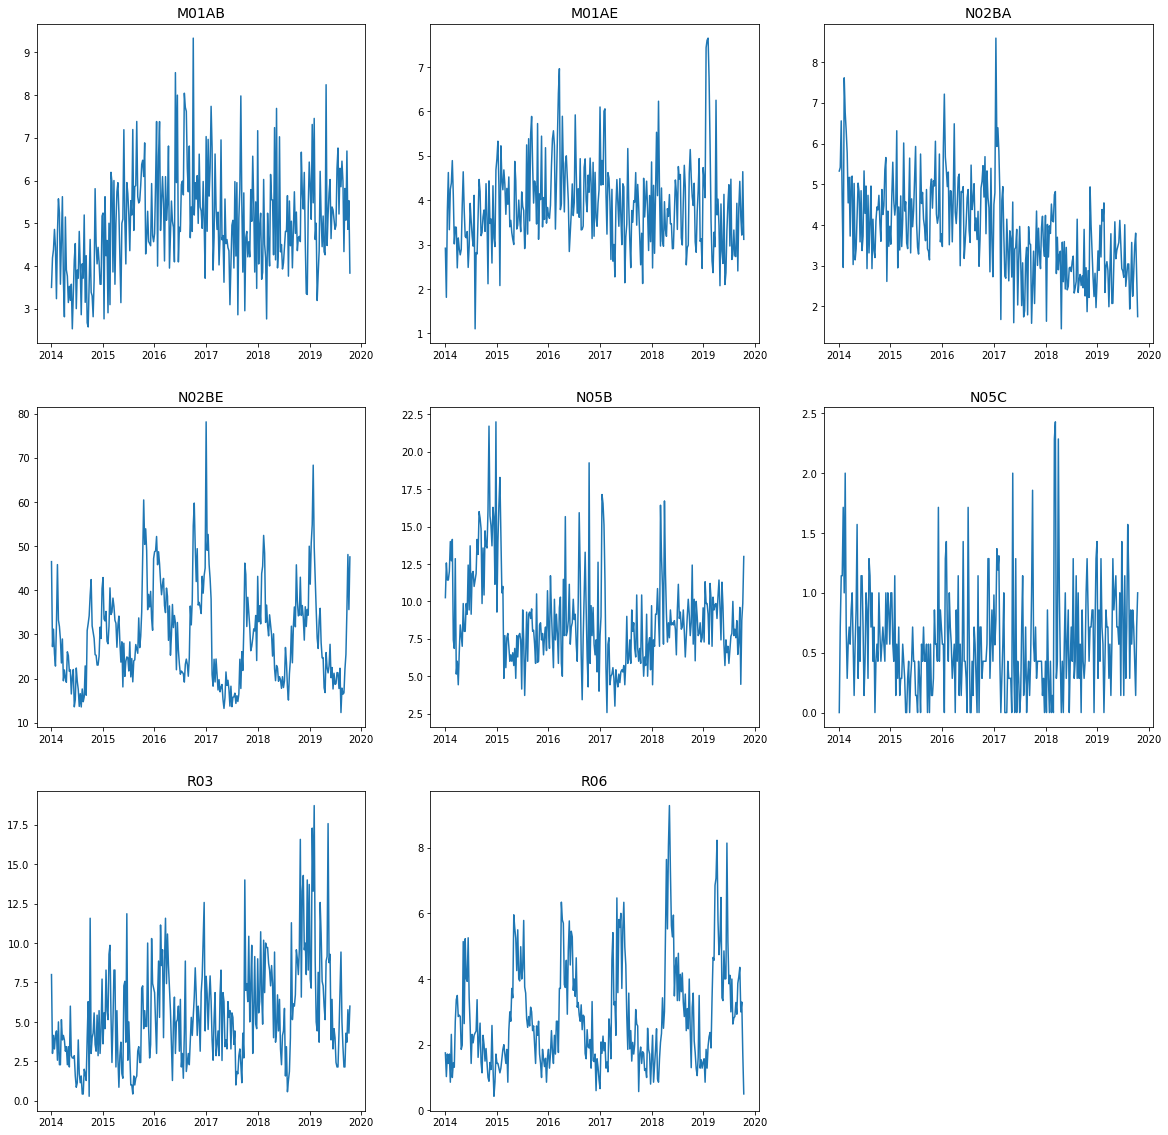

In [31]:
plot_graph(df_week,cols)

In [32]:
def plot_graph(df_month,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_month[col])
        plt.title(col,fontsize=14) 

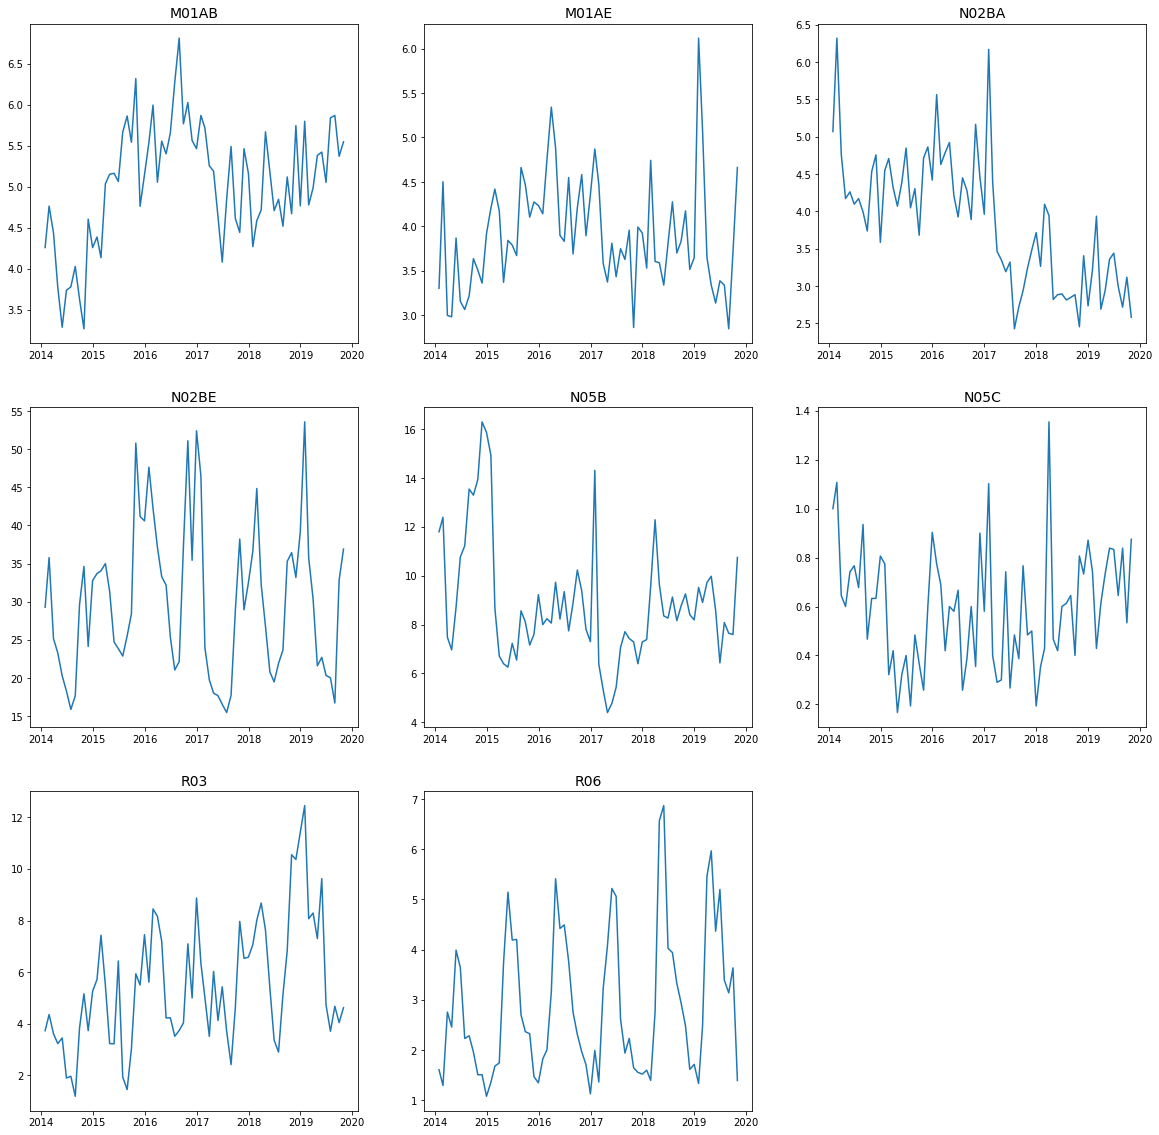

In [33]:
plot_graph(df_month,cols)

In [34]:
def plot_graph(df_year,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_year[col])
        plt.title(col,fontsize=14) 

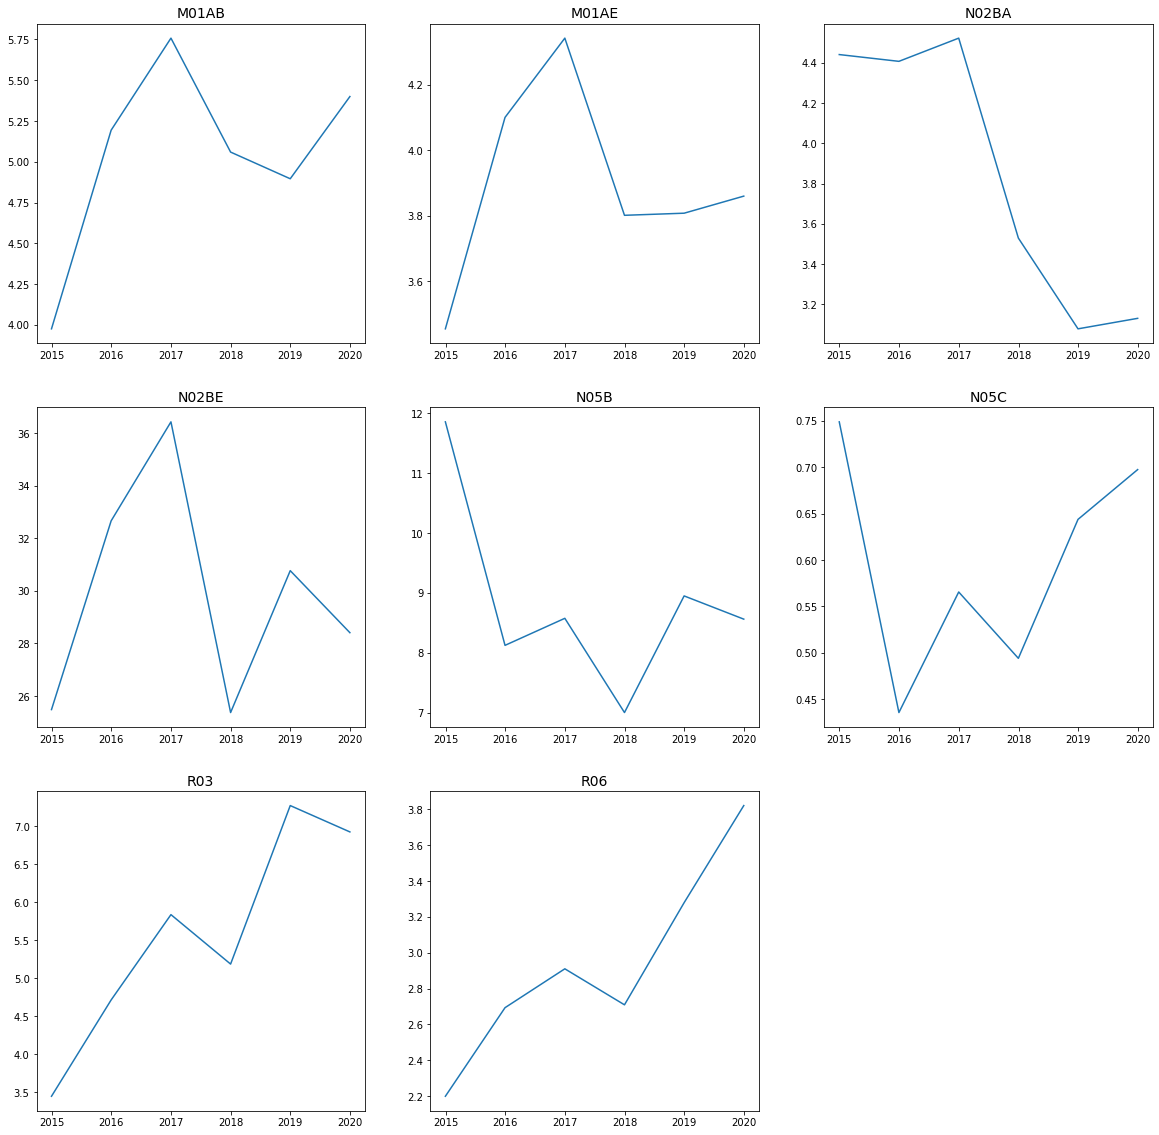

In [35]:
plot_graph(df_year,cols)

### Stationary test : ADF 